### Project: Analysis of NASA Workforce Data from 2006 to 2016

#### Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

### BUSINESS UNDERSTANDING

##### Describe the purpose of the data:
The National Aeronautics and Space Administration (NASA) was created by Congress in 1958 to explore space and push the boundaries of flight. When NASA created the first job descriptions knowns as Position Descriptions (PDs) to identify what skill sets would be needed to design execute, and oversee a plan to place person(s) aboard a human-rated expandable rocket that travels approximately 6,164 mph from Earth to the Moon, they started collecting and inventorying personnel data on all employees hired. This is the same data NASA uses to model hiring practices today.

The data set our team will be examining is 10 years of workforce data collected by NASA from the years of 2006 to 2016. During this time span, NASA was operating several missions such as Space Shuttle, Space Station, Earth and Planetary Sciences, Aeronautical Research and Robotics. The data set is a catalog of personnel data of the type of skillsets it took to successful carry out this missions.

While the available data sets from NASA are almost infinte, we decided to focus our exploration on data from the last 10 years. Our data sets are comprised of 10 excel files downloaded from NASA Human Resources Agency database. Each excel file is one annual year of data. The data was retrieved only on active employees and exported to Excel using the SQL queries documented below. 

##### Proposed outcomes
As a team we want to investigate the number of past hires in the NASA Human Resources agency, via Principle Component Analysis, to establish a predictive model for the next years workforce planning demand. While there are close to 50 atttributes, we suspect that gender, salary, grade, education level, promotion, hire date, diversity and the total number of new hires will be key predictors of years that NASA will increase or decrease hiring practices for certain paygrades. As this is our first project exploring the data, we are documenting the cleaning and exploration of only 2 of the 10 years (2006 and 2007) as a proof on concept. Subsequent projects will include the remining 8 years of data both as part of the dataset and as part of the cross validation data. As a team, we want to produce reproducible code that will help us explore similar attributes in the other years of NASA Human Resources agency data. Successful predictions will be confirmed through cross validation with the remaining years of data.

### DATA UNDERSTANDING

#### Defining the variables
Listed below are the column names, column types and definitions of all columns used for this analysis. Original Dataset had more than 75 variables, we have trimmed it to include the following 47 attributes. 


|  Column Name  	|   Type   	|                       Definition                       	|
|:-------------:	|:--------:	|:------------------------------------------------------:	|
| Agency        	| varchar  	| Agency code identifier                                 	|
| Bdyr          	| varchar  	| Birth year of employee                                 	|
| Coopsch       	| varchar  	| Co-op student's school / university code               	|
| Coopyr        	| varchar  	| Co-op's graduation year                                	|
| Currgrddte    	| datetime 	| Co-op's expected graduation date                       	|
| Dtystn_ind    	| char     	| Duty station code                                      	|
| Dtystnname    	| varchar  	| Location in the U.S. (County) code                     	|
| Edlev         	| char     	| Level of eduction code                                 	|
| Eoddte        	| datetime 	| Employment start date                                  	|
| Foulev        	| char     	| Fourth Completed level in College                      	|
| Fousch        	| char     	| Code associated with School (College/University Table) 	|
| Fouyr         	| char     	| Year attained                                          	|
| Frscdte       	| datetime 	| Federal Retirement Service Complete date               	|
| Fscdte        	| datetime 	| Federal Service Complete Date                          	|
| Grade         	| char     	| Grade level of employee. 1-15                          	|
| Hilev         	| char     	| First school Level                                     	|
| Hisch         	| varchar  	| First school Code                                      	|
| Hiyr          	| varchar  	| First school Graduation Year                           	|
| Install       	| char     	| Center Code (72 = JSC)                                 	|
| Lastpromodt   	| datetime 	| Last promotion date                                    	|
| Loccde        	| varchar  	| Duty Station Code – Where the employee is located      	|
| Nasattl       	| char     	| NASA Job Title                                         	|
| NCC           	| varchar  	| NASA Class Code (Job Classification)                   	|
| Nextwigdte    	| datetime 	| Next with in grade date.                               	|
| Occode        	| varchar  	| Occupational Series Code                               	|
| Opmtitle      	| varchar  	| OP Job Title                                           	|
| Orga          	| varchar  	| Organization Code                                      	|
| Orgabr        	| varchar  	| Organization Branch                                    	|
| Orgadir       	| varchar  	| Organization Directorate                               	|
| Orgadiv       	| varchar  	| Organization Division                                  	|
| Orgasec       	| varchar  	| Organization Section                                   	|
| Postenure     	| char     	| Position Tenure (P=Permanent T=Term)                   	|
| Promontedte   	| datetime 	| Projected Promotion Date                               	|
| Retoptdte     	| datetime 	| Retirement Optional Date                               	|
| Rno           	| varchar  	| Race and National Origin Indicator                     	|
| Seclev        	| varchar  	| Second Completed level in College                      	|
| Secsch        	| varchar  	| Code associated with School (College/University Table) 	|
| Secyr         	| varchar  	| Year attained                                          	|
| Sex           	| varchar  	| Sex                                                    	|
| Step_emp      	| varchar  	| Current step level of the Employee                     	|
| Supind        	| varchar  	| Supervisor Indicator                                   	|
| Suplev        	| varchar  	| The level of the supervisor.                           	|
| Tenure        	| varchar  	| Type of position indicator                             	|
| Time_in_grade 	| varchar  	| Years  in the current grade level                      	|
| Typappt       	| varchar  	| Type of Appointment                                    	|

#### Excel Import to verify data
<span style="color:red">
NOTE: In order to run these files, you will need "nasa_2006.xls" and "nasa_2007.xls" as these are sensitive materials, please contact Bill Kerneckel for download. 
</span>

In [49]:
#load python libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sys
import os
import warnings
import ggplot

In [50]:
#load data file
data_file = pd.read_excel('/Users/wkerneck/desktop/NEW_NASA_2006.xlsx')
data_file2 = pd.read_excel('/Users/wkerneck/desktop/NEW_NASA_2007.xlsx')
data_file3 = pd.read_excel('/Users/wkerneck/desktop/NASA_2008.xlsx')

#removing 1st row from datasets
data_file.drop(0, axis = 0,inplace = True)
data_file2.drop(0, axis = 0,inplace = True)
data_file3.drop(0, axis = 0,inplace = True)

 
#combining dataframes 
df = [data_file, data_file2, data_file3]

cdf = pd.concat(frames, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)


In [62]:
#lets see how many records there are 1st execel file
print("Total Rows: {0}".format(len(cdf)))

Total Rows: 56268


In [63]:
#lets see the header columns and types. Column headings are the same in both files.
print(cdf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56268 entries, 1 to 18800
Data columns (total 52 columns):
Hist_yr          18799 non-null object
agency           56267 non-null object
bdyr             56267 non-null object
coopsch          1497 non-null object
coopyr           37975 non-null object
currgrddte       56147 non-null object
dtystn_ind       56266 non-null object
dtystnname       56266 non-null object
edlev            56177 non-null object
eoddte           56266 non-null object
foulev           717 non-null object
fousch           707 non-null object
fouyr            56266 non-null object
frscdte          56266 non-null object
fscdte           56266 non-null object
grade            56266 non-null object
hilev            56177 non-null object
hisch            46543 non-null object
hiyr             56266 non-null object
install          56266 non-null object
lastpromodte     56261 non-null object
leqdte           15244 non-null object
loccde           56266 non-null object

Data has been read into memory.

In [64]:
#let's check to see where the null values are.
cdf.isnull().sum()

Hist_yr          37469
agency               1
bdyr                 1
coopsch          54771
coopyr           18293
currgrddte         121
dtystn_ind           2
dtystnname           2
edlev               91
eoddte               2
foulev           55551
fousch           55561
fouyr                2
frscdte              2
fscdte               2
grade                2
hilev               91
hisch             9725
hiyr                 2
install              2
lastpromodte         7
leqdte           41024
loccde               2
nasattl          28488
ncc                  2
nextwigdte       10535
occode               2
opmtitle             2
orga                 2
orgabr               2
orgadir              2
orgadiv             70
orgasec              2
postenure            2
probenddte       54366
promontedte      55774
retdiscdte         307
retoptdte          307
rno                  3
salary           37470
seclev           32950
secsch           33606
secyr                2
sex        

In [65]:
#let's check to see where the null values are for 2007
cdf.isnull().sum()

Hist_yr          37469
agency               1
bdyr                 1
coopsch          54771
coopyr           18293
currgrddte         121
dtystn_ind           2
dtystnname           2
edlev               91
eoddte               2
foulev           55551
fousch           55561
fouyr                2
frscdte              2
fscdte               2
grade                2
hilev               91
hisch             9725
hiyr                 2
install              2
lastpromodte         7
leqdte           41024
loccde               2
nasattl          28488
ncc                  2
nextwigdte       10535
occode               2
opmtitle             2
orga                 2
orgabr               2
orgadir              2
orgadiv             70
orgasec              2
postenure            2
probenddte       54366
promontedte      55774
retdiscdte         307
retoptdte          307
rno                  3
salary           37470
seclev           32950
secsch           33606
secyr                2
sex        

We can see the majority of the null values exist in the following categories.

|  Column Name  	|                       Definition                       	|
|:-------------:	|:------------------------------------------------------:	|
| Coopsch        	| Co-op student's school / university code               	|
| Foulev          	| Fourth completed level in college                        	|
| Fousch        	| Code associated with School (College/University Table)	|
| Promontedte       | Projected Promotion Date                                	|

We can see that most of these have to do with the school. This could be a result of employees either declining to answer where they went to school or, the more likely situation, employees not remembering their university code. Currently, we don't have plans for these attributes so let's leave them as is for now. 

#### Data Cleaning

In [72]:
# creating a dataframes for the entire excel file
df = pd.DataFrame(cdf)


In [73]:
# Outputting the Header information of the first dataset (data_file)
df.head()

,Hist_yr,agency,bdyr,coopsch,coopyr,currgrddte,dtystn_ind,dtystnname,edlev,eoddte,...,secyr,sex,step_emp,supind,suplev,tenure,time_in_grade,typappt,worksch,year
1,NaN,NN51,1900,NaN,NaN,1989-10-08 00:00:00,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",9,1991-07-14 00:00:00,...,0,F,9,8,34,1,205.46,10,NaN,2006
2,NaN,NN51,1980,NaN,NaN,2002-09-22 00:00:00,80,"GREENBELT,PRINCE GEORGE'S,MARYLAND",13,1990-07-01 00:00:00,...,0,F,6,2,26,1,50,10,NaN,2006
3,NaN,NN23,1986,NaN,NaN,1996-07-21 00:00:00,88,"HAMPTON,HAMPTON,VIRGINIA",10,1985-04-01 00:00:00,...,0,M,8,8,34,1,124.04,10,NaN,2006
4,NaN,NN64,1994,NaN,NaN,2005-04-17 00:00:00,88,"STENNIS SPACE CENTER, HANCOCK, MISSISSIPPI",21,2005-03-03 00:00:00,...,0,M,2,2,26,1,19.17,10,NaN,2006
5,NaN,NN72,2006,NaN,NaN,2006-07-23 00:00:00,29,"HOUSTON,HARRIS,TEXAS",13,2004-01-11 00:00:00,...,0,F,10,8,34,3,3.98,20,NaN,2006


In [74]:
df.describe().transpose()
#it is important to notice here that most of these variables are categorical
#references to another list. for example, "agency" code correlates to a specific NASA location.

,count,unique,top,freq
Hist_yr,18799,2,2008,18798
agency,56267,11,NN72,10360
bdyr,56267,132,1900,5473
coopsch,1497,323,1631,45
coopyr,37975,27,0,18239
currgrddte,56147,2822,2006-08-20 00:00:00,299
dtystn_ind,56266,44,88,9935
dtystnname,56266,127,"HOUSTON,HARRIS,TEXAS",10155
edlev,56177,42,13,12151
eoddte,56266,7695,1994-10-02 00:00:00,362


From the data, we can see that for both years, NASA center Johnson space Center (JSC) has the largest active workforce at 3443 for 2006 and 3423 for 2007, given by the "install" variable. We can also see that the most popular job title is "aerospace engineer" occuring 3726 for 2006 and 3770 for 2007, given by the "opmtitle" variable. We can also see that "Engineering" is the largest department as represented by the "orgadir" variable. 

#### Analysis of Data

In [75]:
# 2006 - 2008 Female and Male counts to generate pie chart
pd.crosstab(index=df["sex"],columns="count") 


col_0,count
sex,
F,19834
M,36432


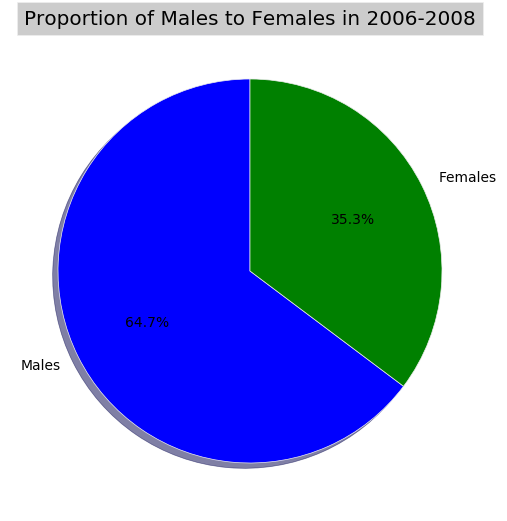

In [76]:
# Proportion of Males to Females in 2006 - 2008 (Pie Graph)
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Males', 'Females'
fracs = [36432, 19834]

pie(fracs, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)

title('Proportion of Males to Females in 2006-2008', bbox={'facecolor':'0.8', 'pad':5})

show()

We can see that Males outnumber Females 65% to 35%.

2007 seems to be consistent with 2006 in that there are 65% Males and 35% Females.

In [77]:
# Employees by Grade for 2006 - 2008
pd.crosstab(index=df["grade"],columns="count") 
# note: grade 0 represents Senior Executive Service (SES) aka the highest paygrade

col_0,count
grade,
0,1267
1,7
2,33
3,22
4,95
5,251
6,800
7,930
8,497


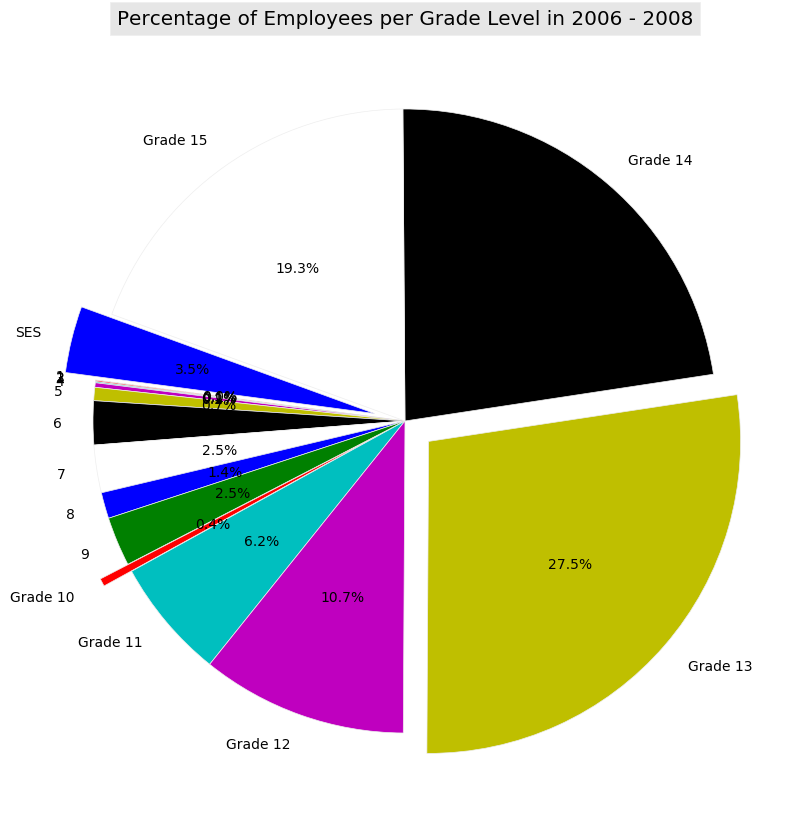

In [78]:
# Grades by Percentages in 2006 - 2008
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
labels = 'SES', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Grade 10', 'Grade 11', 'Grade 12', 'Grade 13', 'Grade 14', 'Grade 15'
fracs = [647, 4, 12, 11, 44, 128, 425, 462, 253, 477, 76, 1168, 2000, 5148, 4254, 3622]
explode = [0.1,0,0,0,0,0,0,0,0,0,0.1,0,0,0.1,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=160)

title('Percentage of Employees per Grade Level in 2006 - 2008', bbox={'facecolor':'0.9', 'pad':5})

show()

Based on the graph, it's easy to see that for years through 2006-2008, grade 13 holds the biggest percentage of the employees per grade level. This makes sense since the majority of the work force ranges in the 9-15 grades with level 9 being titles like "administrative officer" and level 15 being titles like "supervisor program specialist". Investigating the data shows that level 13 employees have titles like "IT specialist". In the context of federal governments, since NASA is a technical agency it is reasonable to observe that most of the employees there are in the higher grades 12, 13, 14, and 15. 

In [80]:
# Supervisor level per Grade for Males and Females in 2006 - 2008
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

df_grouped06 = df.groupby(by=['grade','sex'])
supervisor_level06 = df_grouped06.suplev.sum() / df_grouped06.suplev.count()
ax = supervisor_level06.plot(kind='barh')

title('Supervisor level per Grade for Males and Females 2006-2008', bbox={'facecolor':'0.6', 'pad':1})

show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

For both 2006 and 2007, average position level per grade seems to be pretty consistent around the value of 34, does not have direct reports. We also see that they do not match the average work level of 34. We noticed in the data, the lower the average position level, the higher the grade. This makes sense since the higher the grade, the employee would likely have more responsibilities or supervisor duties. Furthermore, we see that there are fewer supervisor females than supervisor males, which makes sense looking at the female to male pie chart above.

In [81]:
# Education level per Grade for Males and Females in 2006
plt.style.use('ggplot')

df_grouped_06 = df.groupby(by=['grade','sex'])
educ_lev06 = df_grouped_06.edlev.sum() / df_grouped_06.edlev.count()
ax = educ_lev06.plot(kind='barh')

title('Education level per Grade for Males and Females in 2006-2008', bbox={'facecolor':'0.6', 'pad':1})

show()

TypeError: Can't convert 'int' object to str implicitly

For both 2006 and 2007, we can see the average education level per grade for males and females is highest at the 15th and SES levels. This makes sense since the higher grade levels require more schooling.

In [82]:
# Time per Grade Level for Males and Females from 2006 - 2008 (in Months))
plt.style.use('ggplot')

df_grouped = df.groupby(by=['grade','sex'])
time_per_grade = df_grouped.time_in_grade.sum() / df_grouped.time_in_grade.count()
ax = time_per_grade.plot(kind='bar')

title('Time per Grade Level for Males and Females in 2006 (in Months)', bbox={'facecolor':'0.8', 'pad':1})

show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [122]:
df.time_in_grade.max()

526.3

The maximum amount of time spent in one grade level in 2006 is 526.3 months which equates to 43.85 years. This is plausible for a long term employee so we will not rule it out as an outlier.

In [123]:
df2.time_in_grade.max()

536.46

The maximum amount of time spent in one grade level in 2007 is 536.46 months which equates to 44.70 years. This is plausible for a long term employee so we will not rule it out as an outlier.

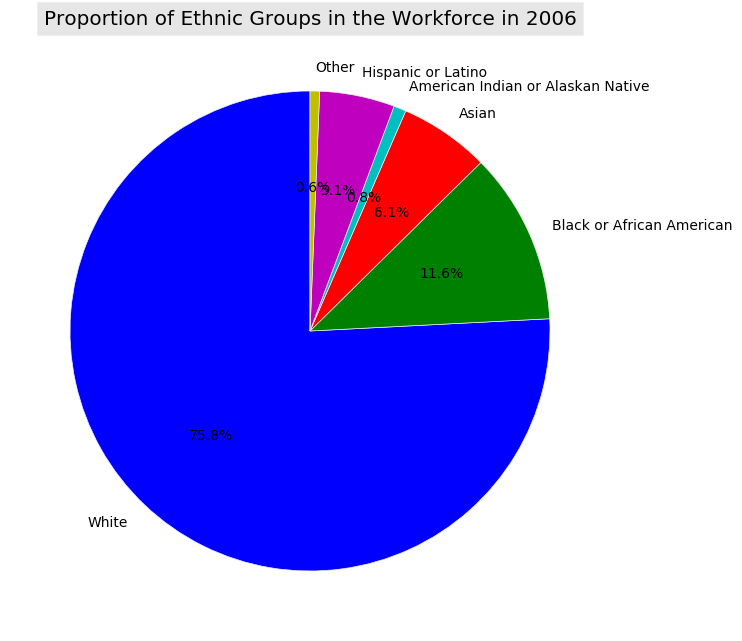

In [127]:
# Breakout of Race and national origin in 2006
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 1.0, 1.0])

# The slices will be ordered and plotted counter-clockwise.
# Key:
# 1 - White, 100 = Black or African American, 1000 = Asian, 10000 = American Indian or Alaskan Native, 100000 = Hispanic or Latino
labels = 'White', 'Black or African American', 'Asian', 'American Indian or Alaskan Native', 'Hispanic or Latino',  'Other'
fracs = [14200, 2168, 1139, 156, 947, 120 ]
explode = [0,0,0,0,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)

title('Proportion of Ethnic Groups in the Workforce in 2006', bbox={'facecolor':'0.9', 'pad':5})

show()

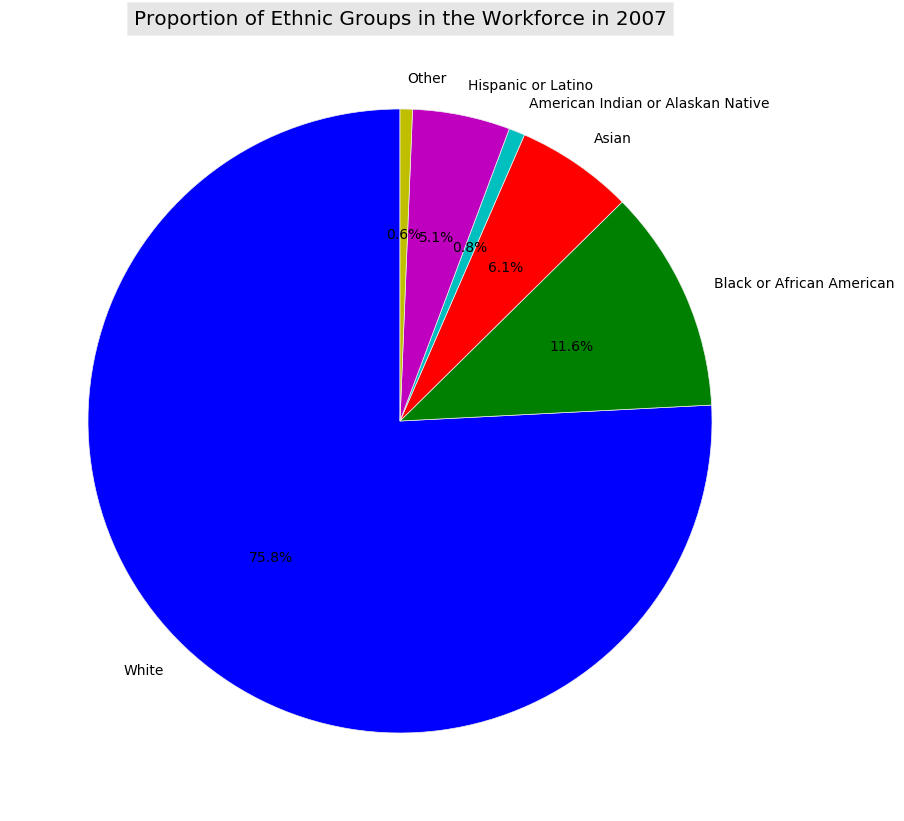

In [125]:
# Breakout of Race and national orgin in 2007
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
# Key:
# 1 - White, 100 = Black or African American, 1000 = Asian, 10000 = American Indian or Alaskan Native, 100000 = Hispanic or Latino
labels = 'White', 'Black or African American', 'Asian', 'American Indian or Alaskan Native', 'Hispanic or Latino',  'Other'
fracs = [14200, 2168, 1139, 156, 947, 120 ]
explode = [0,0,0,0,0,0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=90)

title('Proportion of Ethnic Groups in the Workforce in 2007', bbox={'facecolor':'0.9', 'pad':5})

show()

For 2006 and 2007, we can see that the workforce is overwhelmingly white. 
This makes sense if we look at the census data for the US around this time. 
In 2010, census.gov (http://www.census.gov/prod/cen2010/briefs/c2010br-02.pdf) reports that white americans make up about 72% of the American population. Proportionally, it seems that NASA workforce diversity mirrors that of the US. Additionally, since we know that NASA primiarly hires engineers and the diversity of graduating engineers are primarily white Americans, this proves consistent.

### Conclusion

Comparing the 2006 and 2007 NASA Human Resources agency data, there are a few important things we can immediately notice. First, NASA is a male dominated agency. Males outnumber females almost 2 to 1. That being said, for our next project, we may have to pull random samples from the dataset that guarantees an equal number of males and females for analysis. Doing this would give more meaning to our investigation in average supervisor level per grade and time spent in each grade. For the percentage of employees by grade, we can see that the highest percentage is grade 13. This makes sense since NASA is a technical-skills based agency and is the second highest graded federal agency. The supervisor indicator per grade averaged around level 34. This makes sense since the higher the grade, the lowers the supervisor indicator level. Employees with a level 34 supervisor indicator would have no direct reports. The education level per grade maintains that the higher the grade, the more education required. The time spent per grade, with the exception of the grade 10 male that has been in the same position for about 43 years, supports higher grades spending more time in their position. The diversity data is consistent with demographic findings from the 2000 and 2010 census information. 

#####Next Steps
As a team, we would like to explore additional variables like salary, promotion date, and total number of new hires, to predict workload planning demand. This, in addition to the research we have completed in this document, could be possible key predictors for years that NASA increases or decreases hiring practices for certain grades. Moving forward we hope to use Principle Component Analysis to establish a predictive model for the next years workforce planning demand using the remining 8 years of data both as part of the dataset and as part of the cross validation data. 

### Acknowledgments

- Office of Personnel Management (OPM)
- National Aeronautics and Space Administration (NASA)
- NASA Johnson Space Center (JSC)


### Appendix

#### SQL Query

A SQL query was written to pull the needed data from NASA's Human Resources Agency Workforce Microsoft SQL Database. The SQL query retrieves records for only active employee by calendar year.

```
SELECT
    [agency]
    ,convert(varchar(10),[apptntedte], 101) as apptntedte
    ,[bdyr]
    ,[citizen]
    ,[coopfld]
    ,[cooplev]
    ,[coopsch]
    ,[coopyr]
    ,convert(varchar(10),[currgrddte], 101) as currgrddte
    ,[dlrlimit]
    ,[dtystn_ind]
    ,[dtystnname]
    ,[dtysts]
    ,[edlev]
    ,convert(varchar(10),[eoddte], 101) as eoddte
    ,[finstm]
    ,[foufld]
    ,[foulev]
    ,[fousch]
    ,[fouyr
    ,convert(varchar(10),[frscdte], 101) as frscdte
    ,convert(varchar(10),[fscdte], 101) as fscdte
    ,convert(varchar(10),[fscdte_enhanced], 101) as fscdte_enhanced
    ,[grade]
    ,[graderetn]
    ,[hifld]
    ,[hilev]
    ,[hisch]
    ,[hiyr]
    ,[hrlimit]
    ,[install]
    ,[install_calc]
    ,convert(varchar(10),[lastpromodte], 101) as lastpromodte
    ,convert(varchar(10),[leqdte], 101) as leqdte
    ,[loccde]
    ,convert(varchar(10),[lwopntedte], 101) as lwopntedte
    ,[nasattl]
    ,[ncc]
    ,[ncc_old]
    ,convert(varchar(10),[nextwigdte], 101) as nextwigdte
    ,convert(varchar(10),[nscdte], 101) as nscdte
    ,[occode]
    ,[opmtitle]
    ,[orga]
    ,[orgabr]
    ,[orgadir]
    ,[orgadiv]
    ,[orgasec]
    ,[poi]
    ,[poscrit]
    ,[postenure]
    ,[prd]
    ,[probenddte]
    ,convert(varchar(10),[probenddte], 101) as probenddte
    ,[projpromo]
    ,convert(varchar(10),[promontedte], 101) as promontedte
    ,convert(varchar(10),[retdiscdte], 101) as retdiscdte
    ,convert(varchar(10),[retoptdte], 101) as retoptdte
    ,[rno]
    ,convert(varchar(10),[rscdte], 101) as rscdte
    ,[rtd]
    ,[secfld]
    ,[seclev]
    ,[secsch]
    ,[secyr]
    ,[sex]
    ,[spid]
    ,[step_emp]
    ,[stepretn]
    ,[super_diff]
    ,[supind]
    ,[suplev]
    ,[tenure]
    ,convert(varchar(10),[tenurebdte], 101) as tenurebdte
    ,[time_in_grade]
    ,[typappt]
    ,[worksch]
FROM [XXX].[XXX].[PerStat]
WHERE dtysts in ('a','c','f','i','l','m','p','v','y')
AND Hist_yr = 'ENTER 4 DIGIT YEAR'
```

